In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=np.loadtxt('Population_vs_profit.txt', dtype='float', delimiter=',')

In [5]:
df=pd.DataFrame(data,columns=['Population','Profit'])

In [6]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
x_train=data[:,0];y_train=data[:,1]

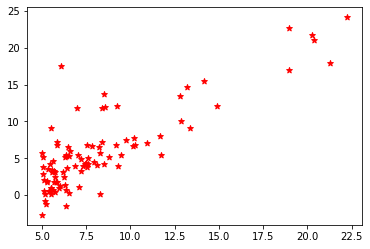

In [8]:
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(x_train,y_train,marker='*',color='r')

In [9]:
x_train_=np.reshape(x_train,(-1,1))

In [11]:
#add polynomial features up to fourth order
x_new=np.concatenate((x_train_,x_train_**2,x_train_**3,x_train_**4),axis=1)

In [12]:
#Using sickit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor 

In [13]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_new)
sgdr=SGDRegressor(max_iter=10000)
sgdr.fit(x_scaled,y_train)
print(sgdr)

SGDRegressor(max_iter=10000)


In [14]:
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 99, number of weight updates: 9604.0


In [15]:
b_sklearn=sgdr.intercept_;w_sklearn=sgdr.coef_
print(f"model parameters:                   w: {w_sklearn}, b:{b_sklearn}")

model parameters:                   w: [ 2.9185819   1.51813219  0.43660947 -0.31574473], b:[5.83949308]


In [16]:
y_pred_sgdr = sgdr.predict(x_scaled)

In [17]:
df_2=pd.DataFrame(np.concatenate((np.expand_dims(x_train,axis=1),np.expand_dims(y_train,axis=1),np.expand_dims(y_pred_sgdr,axis=1),),axis=1),columns=['Population','Profit','Predicted_profit'])
df_2.head(11)

,Population,Profit,Predicted_profit
0,6.1101,17.5920,3.520287
1,5.5277,9.1302,2.961715
2,8.5186,13.6620,5.961326
3,7.0032,11.8540,4.400799
4,5.8598,6.8233,3.278720
5,8.3829,11.8860,5.818178
6,7.4764,4.3483,4.879107
7,8.5781,12.0000,6.024303
8,6.4862,6.5987,3.887546
9,5.0546,3.8166,2.517010


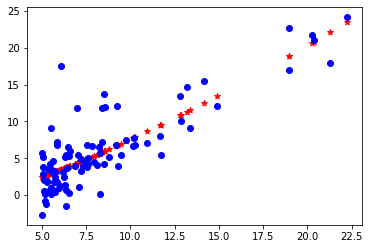

In [18]:
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(x_train,y_pred_sgdr,marker='*',color='r')
ax.scatter(x_train,y_train,marker='o',color='b')
#plt.show()